# Classification of IMDB reviews

# Import Libraries

In [1]:
import csv
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import matplotlib.pyplot as plt


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [2]:
tf.enable_eager_execution()

# Define Parameters

In [12]:
vocab_size = 10000
max_len = 200
embedding_dim = 16
pad_type = 'post'
trunc_type = 'post'
oov_tok = '<OOV>'
EPOCHS = 10


# Load Data

In [13]:
data, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)
train_data, test_data = data['train'], data['test']

train_sent = []
train_label = []
test_sent = []
test_label = []

for s,l in train_data:
    train_sent.append(str(s.numpy()))
    train_label.append(l.numpy())
for s,l in test_data:
    test_sent.append(str(s.numpy()))
    test_label.append(l.numpy())

train_label = np.array(train_label)
test_label = np.array(test_label)


In [14]:
print(train_sent[0])
print(train_label.shape)
print(test_sent[0])
print(test_label.shape)

b"Oh yeah! Jenna Jameson did it again! Yeah Baby! This movie rocks. It was one of the 1st movies i saw of her. And i have to say i feel in love with her, she was great in this move.<br /><br />Her performance was outstanding and what i liked the most was the scenery and the wardrobe it was amazing you can tell that they put a lot into the movie the girls cloth were amazing.<br /><br />I hope this comment helps and u can buy the movie, the storyline is awesome is very unique and i'm sure u are going to like it. Jenna amazed us once more and no wonder the movie won so many awards. Her make-up and wardrobe is very very sexy and the girls on girls scene is amazing. specially the one where she looks like an angel. It's a must see and i hope u share my interests"
(25000,)
b"I've watched the movie actually several times. And what i want to say about it is the only thing that made this movie high rank was the Burak Altay's incredible performance, absolutely nothing but that. Not even those sil

# Sentences to Sequences

In [15]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sent)
word_index = tokenizer.word_index

train_seq = tokenizer.texts_to_sequences(train_sent)
train_seq_pad = pad_sequences(train_seq, padding=pad_type, truncating=trunc_type, maxlen=max_len)

test_seq = tokenizer.texts_to_sequences(test_sent)
test_seq_pad = pad_sequences(test_seq, padding=pad_type, truncating=trunc_type, maxlen=max_len)


In [21]:
print(train_seq_pad[0])
print(train_label)

[  59  474 1281 6747 9711  123   10  172 1281  899   12   18 3387   10
   14   30    5    2 3418  101   11  216    5   40    3   11   28    6
  136   11  231    9  119   17   40   56   14   88    9   12  854    8
    8   40  234   14 1362    3   51   11  432    2   92   14    2 1396
    3    2 6175   10   14  490   23   58  382   13   34  276    4  173
   86    2   18    2  538 8836   72  490    8    8   11  448   12  938
 1550    3 1221   58  827    2   18    2  777    7 1208    7   54  963
    3  319  250 1221   25  168    6   39   10 6747 2691  178  288   53
    3   61  604    2   18  547   37  112 2147   40   97   57    3 6175
    7   54   54 1296    3    2  538   22  538  137    7  490 4916    2
   30  121   56  272   39   35 2326  103    4  211   69    3   11  448
 1221 1517   63 5050    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

# Define Model

In [25]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_len),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 200, 16)           160000    
_________________________________________________________________
global_average_pooling1d_2 ( (None, 16)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


# Train Model

In [26]:
history = model.fit(train_seq_pad, train_label, epochs=EPOCHS, validation_data=(test_seq_pad, test_label), verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 4s - loss: 0.4941 - acc: 0.7696 - val_loss: 0.3446 - val_acc: 0.8554
Epoch 2/20
 - 4s - loss: 0.2740 - acc: 0.8912 - val_loss: 0.3207 - val_acc: 0.8653
Epoch 3/20
 - 3s - loss: 0.2204 - acc: 0.9159 - val_loss: 0.3327 - val_acc: 0.8604
Epoch 4/20
 - 3s - loss: 0.1868 - acc: 0.9312 - val_loss: 0.3651 - val_acc: 0.8534
Epoch 5/20
 - 3s - loss: 0.1610 - acc: 0.9428 - val_loss: 0.4065 - val_acc: 0.8467
Epoch 6/20
 - 3s - loss: 0.1407 - acc: 0.9522 - val_loss: 0.4403 - val_acc: 0.8432
Epoch 7/20
 - 3s - loss: 0.1227 - acc: 0.9594 - val_loss: 0.4836 - val_acc: 0.8398
Epoch 8/20
 - 3s - loss: 0.1096 - acc: 0.9651 - val_loss: 0.5090 - val_acc: 0.8362
Epoch 9/20
 - 3s - loss: 0.0971 - acc: 0.9683 - val_loss: 0.5795 - val_acc: 0.8282
Epoch 10/20
 - 3s - loss: 0.0843 - acc: 0.9753 - val_loss: 0.5936 - val_acc: 0.8292
Epoch 11/20
 - 3s - loss: 0.0744 - acc: 0.9790 - val_loss: 0.6703 - val_acc: 0.8250
Epoch 12/20
 - 3s - loss: 0.0646 - 

# Plot results

W0702 18:39:02.067520 13444 legend.py:1289] No handles with labels found to put in legend.


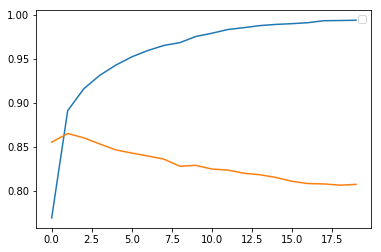

W0702 18:39:02.216403 13444 legend.py:1289] No handles with labels found to put in legend.


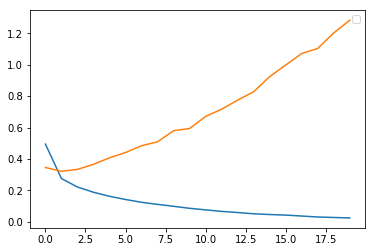

In [27]:
def plot_data(history, string):
    epochs = range(EPOCHS)
    plt.plot(epochs, history.history[string])
    plt.plot(epochs, history.history['val_'+string])
    plt.legend()
    plt.show()

plot_data(history, 'acc')
plot_data(history, 'loss')